<a href="https://colab.research.google.com/github/zaida-rivai/evo_art/blob/master/upload_15_10_pretrainedbiggan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pretrained BIGGAN pre-process

In [0]:
!pip install tensorflow
!pip install tensorflow-hub
!pip install Pillow
!pip install nltk
!pip install libsixel-python

  Created wheel for libsixel-python: filename=libsixel_python-0.5.0-cp36-none-any.whl size=12276 sha256=57cfbb608e0f89f1bf8f6e2482d1f7bbadefdb9c860cbe2ed50f0b310ed95606
  Stored in directory: /root/.cache/pip/wheels/83/ba/62/a3c568b79bf35a7a79d44cf0ceb11212006484019a4413d5d1
Successfully built libsixel-python


In [0]:
# Downgrade to TensorFlow 1.12.2
!pip install --upgrade tensorflow-gpu==1.12.2

     |████████████████████████████████| 127.8MB 269kB/s 
     |████████████████████████████████| 3.1MB 26.1MB/s 
ERROR: tensorflow 1.15.0rc3 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.12.2 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [0]:
#Install Cuda 9.0 
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!apt-get install cuda=9.0.176-1
!echo ****** Cuda reinstall completed. Restart runtime now! *******

--2019-10-15 10:43:16--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.182.215
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.182.215|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?vntRyJLRbfXxCuAwkVYHIUEKBQMrPMYIUJeu_l1VLuATw5qUjPsfg1aQSP50WIT11Az78bAHwMDMJgmSr-yvzTEqEUJCwIruF-c3S_-qrYr4JwEUJP_f4BIgPs9K2l1yN-2pRqM4gKUonzUbLoaUxeUZzxK0wUWuAdqNmGG_MYUYyvVxOF9nbJiZmIoCa__UwaugG0lczxzSmUyDv4nA [following]
--2019-10-15 10:43:17--  https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?vntRyJLRbfXxCuAwkVYHIUEKBQMrPMYIUJeu_l1VLuATw5qUjPsfg1aQSP50WIT11Az78bAHwMDMJgmSr-yvzTEqEUJCwIruF-c3S_-qrYr4Jw

In [0]:
#must be 1.12.2
import tensorflow as tf
print("Now running TensorFlow version %s on Colab!" %tf.VERSION)
assert tf.VERSION == '1.12.2'

Now running TensorFlow version 1.12.2 on Colab!


In [0]:
#must be release 9 
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


In [0]:
#NLTK downloader
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# **Load pretrained biggan model**

In [0]:
#continue from here on after refreshing Runtime --> restart runtime 
!git clone https://github.com/huggingface/pytorch-pretrained-BigGAN.git
!cd pytorch-pretrained-BigGAN

Cloning into 'pytorch-pretrained-BigGAN'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 65 (delta 29), reused 61 (delta 27), pack-reused 0
Unpacking objects: 100% (65/65), done.


In [0]:
!pip install pytorch-pretrained-biggan

In [0]:
from PIL import Image
import numpy as np

# Below all directly copied from https://github.com/huggingface/pytorch-pretrained-BigGAN
import torch
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample,
                                       save_as_images, display_in_terminal)

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
#import logging
#logging.basicConfig(level=logging.INFO)

# Load pre-trained model tokenizer (vocabulary)
model = BigGAN.from_pretrained('biggan-deep-512')

100%|██████████| 800/800 [00:00<00:00, 331926.32B/s]


In [0]:
import time
from google.colab import files
from IPython.display import Image

In [0]:
# Prepare an input
# truncation originally 0.4
start = time.time()
truncation = 0.4
class_vector = (one_hot_from_names(['soap bubble'], batch_size=1) + one_hot_from_names(['coffee'], batch_size=1))/2
#class_vector = one_hot_from_names(['volcano'], batch_size=1)
noise_vector = truncated_noise_sample(truncation=truncation, batch_size=1)

# All in tensors
noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)

# If you have a GPU, put everything on cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
noise_vector = noise_vector.to(device)
class_vector = class_vector.to(device)
model.to(device)


# Generate an image
with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)

output = output.cpu()

# Save results as png images
save_as_images(output)
#send image to directory 
end = time.time()
print('Elapse time:',(end - start))

#download file 
#files.download("output_0.png") 

Elapse time: 0.43480610847473145


In [0]:
#move image
mv 'output_0.png' /content/images/

In [0]:
#Remove images in content folder
rm 'output_0.png'

rm: cannot remove 'output_0.png': No such file or directory


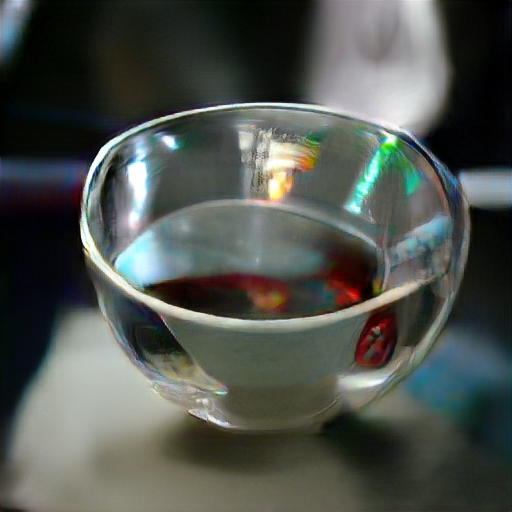

In [0]:
#show file 
Image('output_0.png')

### Store files in directory

In [0]:
mkdir images

cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb  pytorch-pretrained-BigGAN/
images/                                             sample_data/
output_0.png


# Create Moving Images

In [0]:

image_folder = '/content/InterFaceGAN/results/%s' %latent_direction
video_fps = 12.

# NOG NIET NAAR GEKEKEN

In [0]:
# AT START OF PROGRAM (if necessary for tensorflow stuff)
#tf.enable_eager_execution() 

In [0]:
# looping evolution process
# output_0 = child/main parent, output_1-3 = mating parent options

while True:
    inp = 0
    while not inp in ["1","2","3","s"]:
        inp = input("Mate with picture [1,2,3] ")
    if inp == "s":
        break

    #child_vector = (class_vectors[0] + class_vectors[int(inp)])/2
    print(class_vectors[0])
    child_vector = (class_vectors[0] + class_vectors[int(inp)])/2
    
#     sess = tf.Session()
#     with sess.as_default():
#         numpy_array = child_vector.eval()
#         print(numpy_array)
    
    print(child_vector)
#     print(class_vectors)
#     print(class_vectors[0])
#     print(class_vectors[int(inp)])
#     print(child_vector)
    parent_vectors = one_hot_from_names(['cock','clock','woollen'], batch_size=3)
    print(parent_vectors)
    #class_vector = np.append(child_vector, parent_vectors, axis=0)
    noise_vectors = truncated_noise_sample(truncation=truncation, batch_size=1)

    # All in tensors
    noise_vectors = torch.from_numpy(noise_vectors)
    tensor_parents = torch.from_numpy(parent_vectors)
    print(tensor_parents)
    class_vector = torch.cat((child_vector, tensor_parents), dim=0)

    # Generate an image
    with torch.no_grad():
        output = model(noise_vectors, class_vector, truncation)

    # Save results as png images
    save_as_images(output)

KeyboardInterrupt: ignored